In [1]:
from scipy.fft import fft, ifft
import numpy as np

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)

print(y)

yinv = ifft(y)
print(yinv)

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


2   4.533514120981248


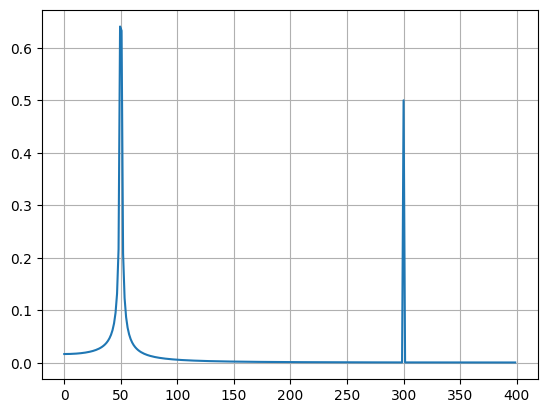

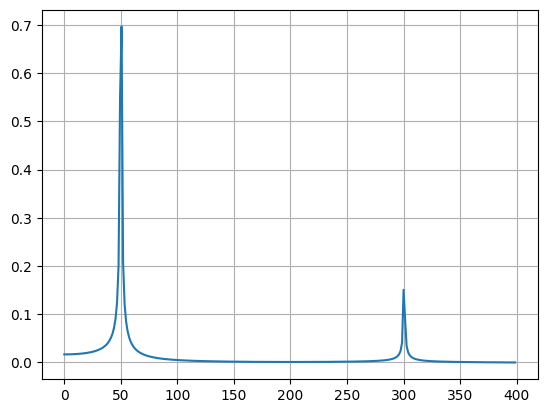

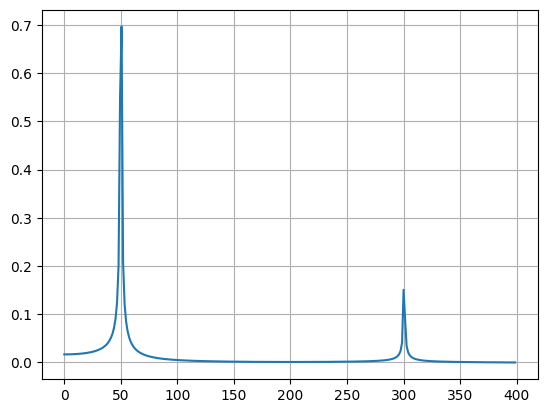

In [48]:
from scipy.signal import kaiserord, lfilter, firwin
from scipy.fft import fft, fftfreq
import numpy as np

sample_rate = 1000
nyquist_rate = sample_rate / 2.0
transition_width = 5000 / nyquist_rate

stop_band_attenuation_dB = 50
low_transition_freq = 150
high_transition_freq = 3000

FIR_order, beta = kaiserord(stop_band_attenuation_dB, transition_width)

print(FIR_order, " ", beta)

lowpass_filter = firwin(FIR_order, low_transition_freq, window=('kaiser', beta), fs = sample_rate)

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(300 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

# This is the plot of the frequency components of the signal
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

# Now lets see what happens when we try to filter it
filtered_signal = np.convolve(y, lowpass_filter)

xf2 = fft(filtered_signal)

plt.plot(xf, 2.0/N * np.abs(xf2[0:N//2]))
plt.grid()
plt.show()

# Little more abstract
low_freq_signal = lfilter(lowpass_filter, 1.0, y)

xf3 = fft(filtered_signal)

plt.plot(xf, 2.0/N * np.abs(xf3[0:N//2]))
plt.grid()
plt.show()

# for i in range(len(yf)):
#     print(xf[i], " ", yf[i])